In [96]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Explosing Data

In [97]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
print((train_df.shape[0], train_df.shape[1]))
print(test_df.shape[0], test_df.shape[1])

(891, 12)
418 11


# 'Sex' Relationship

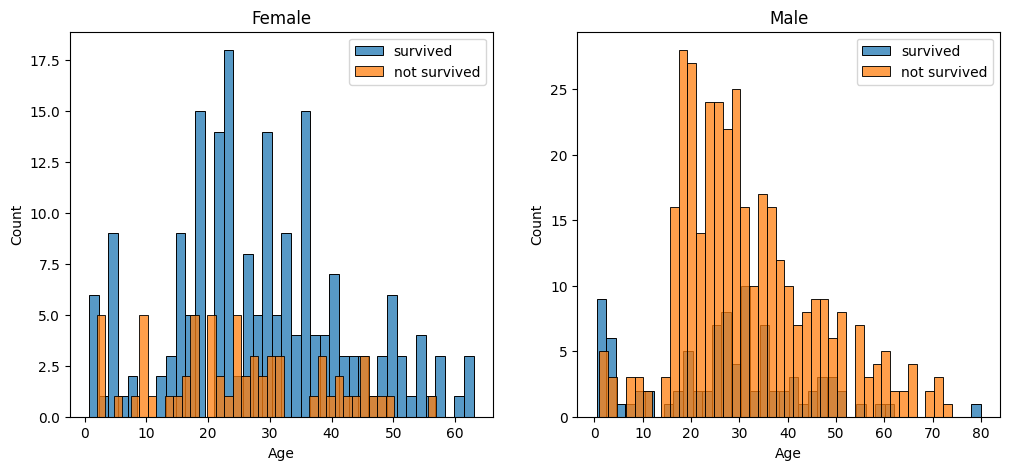

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1]['Age'].dropna(),bins=40,label='survived',ax=axes[0])
ax = sns.histplot(women[women['Survived']==0]['Age'].dropna(),bins=40,label='not survived',ax=axes[0])
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1]['Age'].dropna(),bins=40,label='survived',ax=axes[1])
ax = sns.histplot(men[men['Survived']==0]['Age'].dropna(),bins=40,label='not survived',ax=axes[1])
ax.legend()
ax.set_title('Male')
plt.show()

# 'Embarked'Relationship

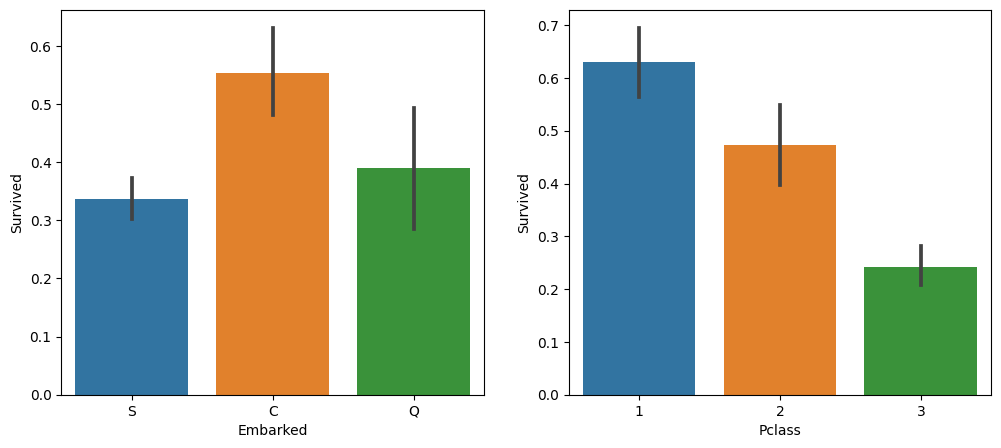

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axes[0])
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[1])
plt.show()

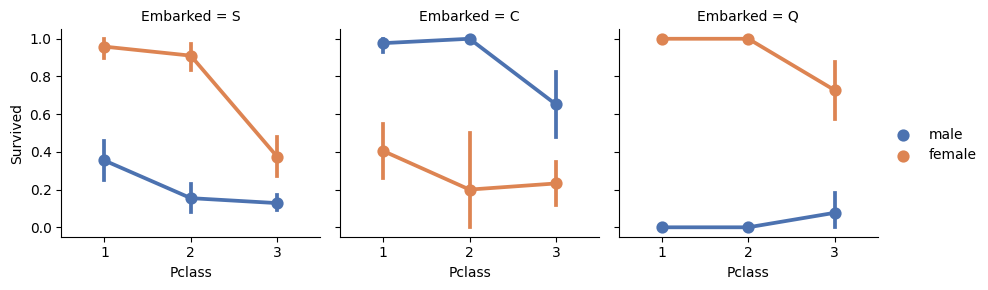

In [104]:
g = sns.FacetGrid(train_df,col = 'Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
g.add_legend();

# Cleaning Data

In [105]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'],axis=1)
data = [train_df, test_df]

data[0].shape,data[1].shape

((891, 10), (418, 9))

In [107]:
train_df['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [108]:
# extract title feature 
for dataset in data:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=True)
    
pd.crosstab(train_df['Title'], train_df['Sex']).sort_values(by='female', ascending=False)

Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Mme,1,0
Countess,1,0
Dr,1,6
Ms,1,0
Lady,1,0
Capt,0,1


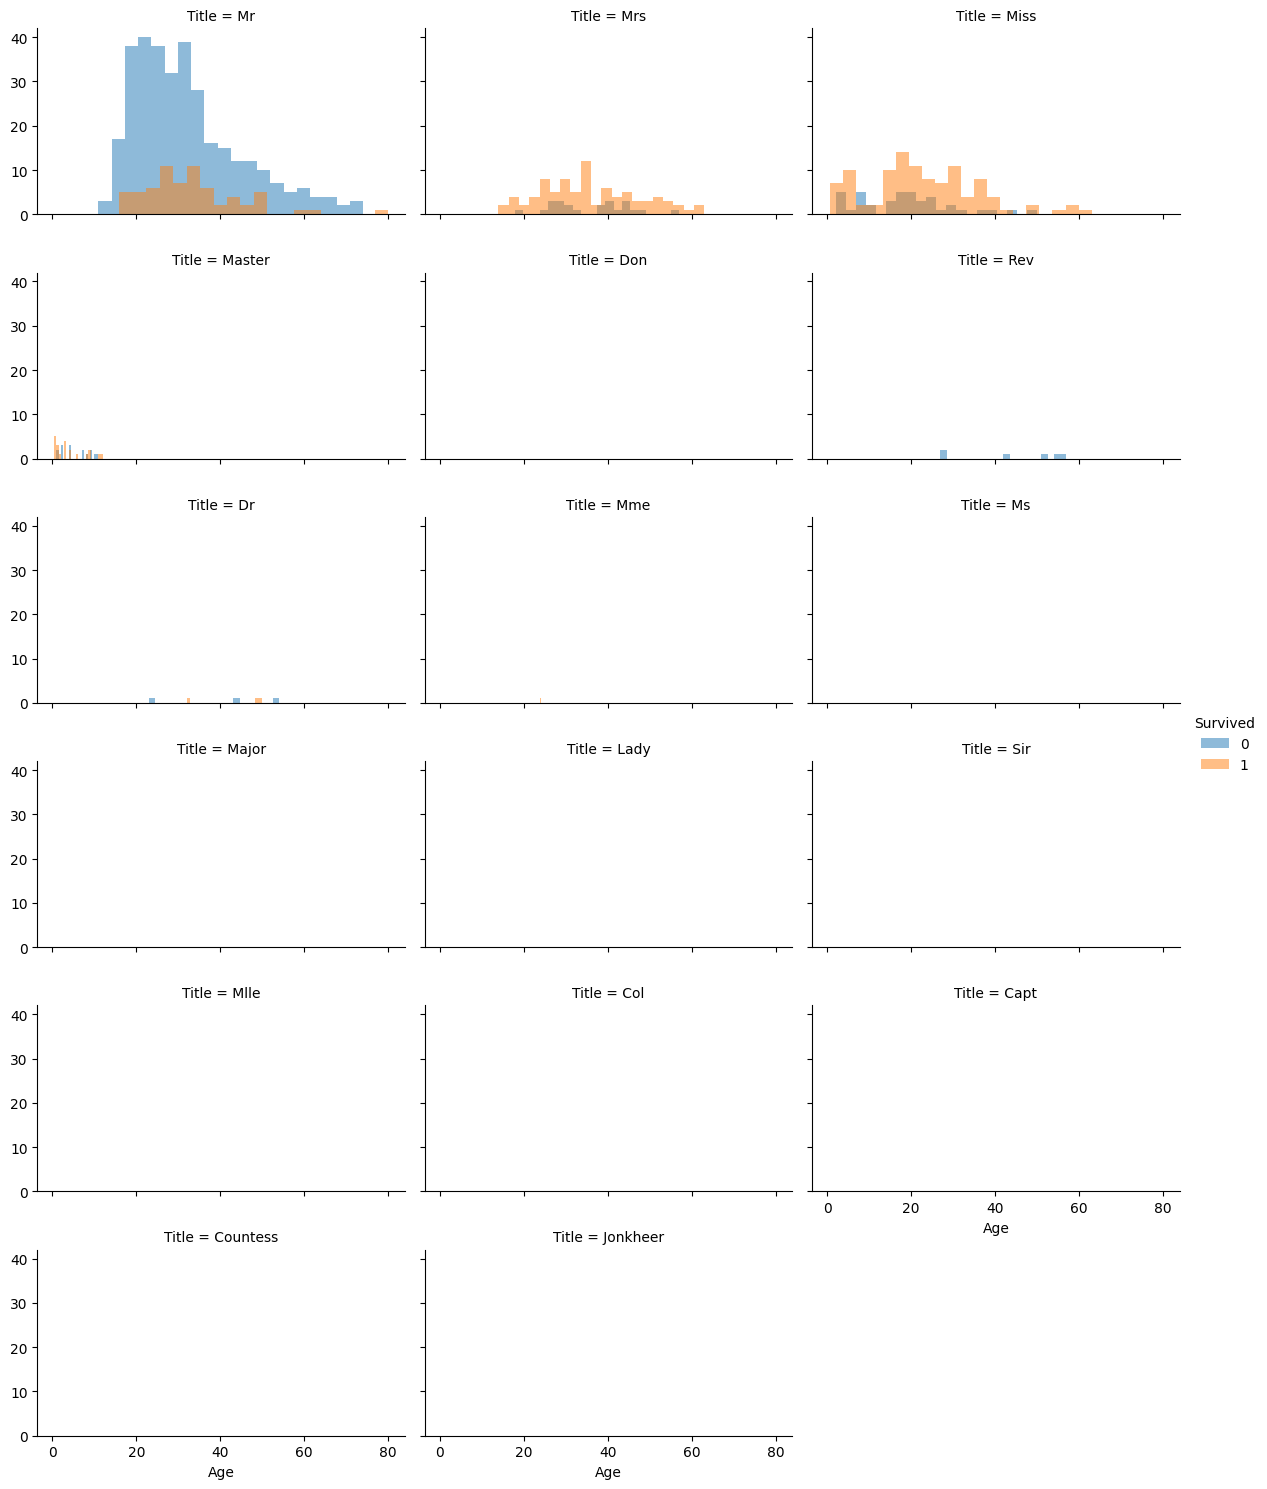

In [109]:
grid = sns.FacetGrid(train_df, col='Title',hue='Survived',col_wrap=3,height=2.5,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [110]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt',
                                                'Col','Don','Major','Rev',
                                                'Sir','Jonkeer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'], as_index=True).mean()

,Survived
Title,
Dr,0.428571
Jonkheer,0.000000
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.333333


In [111]:
# Convert titles to numbers
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)
    
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [112]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
data = [train_df,test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [113]:
# Covert sex to numbers:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
    
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


# 填补缺失值
1. Age、Sex和Pclass之间有相关性，使用相关特征组合集中的age来预测age值
2. 基于方法一，使用Pclass和Sex组合集的均值和标准差之间的随机数来预测Age值
3. 引入随机噪声

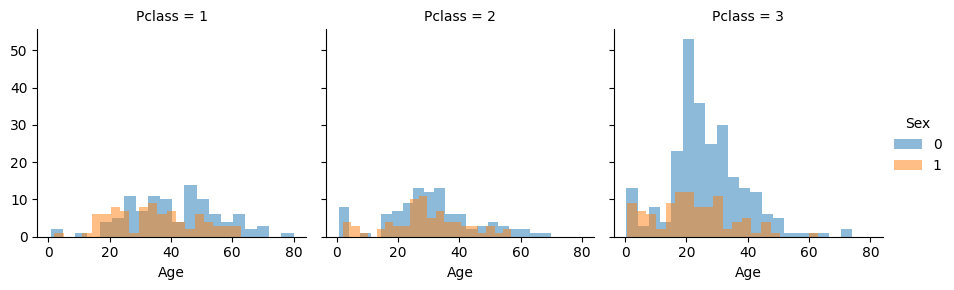

In [114]:
# Age
grid = sns.FacetGrid(train_df, col='Pclass', hue='Sex')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [115]:
guess_ages = np.zeros((2,3))


for dataset in data:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            guess_ages[i,j] = int(guess_df.median())        
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                       'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
        

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [116]:
# 创建年龄段，并确定其与Survived的相关性
# 一般在建立分类模型时，需要对连续变量离散化，特征离散化后，模型会更稳定，降低模型过拟合的风险

train_df['AgeBand'] = pd.cut(train_df['Age'],5) # 等距分5段
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)



,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [117]:
for dataset in data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [118]:
train_df = train_df.drop(['AgeBand'], axis = 1)
data = [train_df, test_df]
train_df.head(5)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1
414,1306,1,1,2,0,0,108.9000,C,5
415,1307,3,0,2,0,0,7.2500,S,1
416,1308,3,0,1,0,0,8.0500,S,1


**结合SibSp和Parch特征创建一个新特征FamilySize，意为包括兄弟姐妹，配偶，父母，孩子和自己的所有家人数量**

In [119]:
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**创建一个新特征IsAlone，取值为0表示不是独自一人，1表示独自一人**

In [120]:
# 创建新特征IsAlone
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


**舍弃Parch、SibSp和FamilySize特征，转而支持IsAlone，因为IsAlone更能反应其与Survived的相关性**

In [121]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data = [train_df, test_df]

train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [122]:
# 创建Age * Pclass特征以此来结合Age和Pclass变量

for dataset in data:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass
    
train_df.loc[:,['Age*Pclass', 'Age', 'Pclass']].head(10)
train_df[['Age*Pclass', 'Survived']].groupby(['Age*Pclass'], as_index=False).mean()

,Age*Pclass,Survived
0,0,0.550000
1,1,0.728814
2,2,0.520408
3,3,0.277487
4,4,0.415094
5,6,0.149425
6,8,0.000000
7,9,0.111111
8,12,0.000000


**填补分类特征Embarked**

S、Q、C三种取值特征，训练集仅有两个缺失值，采用众数填补缺失值

In [123]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [124]:
# 转换分类特征为序数
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [125]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Pclass     0
dtype: int64

**对Fare进行分箱并替换为序数**

In [126]:
# 测试集中有一个缺失值，用中位数进行填补

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


<Axes: xlabel='Fare', ylabel='Count'>

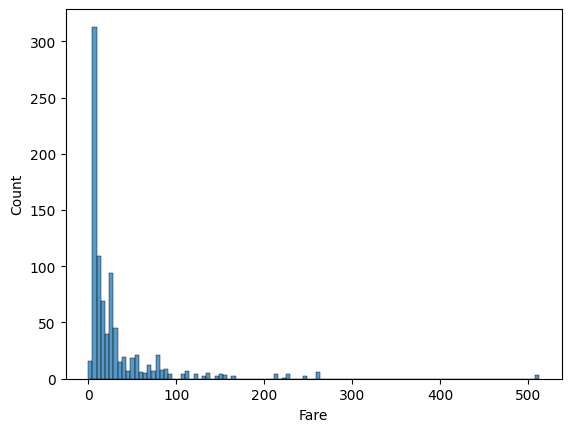

In [127]:
sns.histplot(train_df['Fare'])

In [128]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)  #根据样本分位数进行分箱，等频分箱
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [129]:
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass,FareBand
0,0,3,0,1,7.2500,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,71.2833,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,7.9250,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,53.1000,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,8.0500,0,1,1,6,"(7.91, 14.454]"


In [130]:
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis=1)
data = [train_df, test_df]

train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [131]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


# 构建模型

In [132]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

**逻辑回归**

In [133]:
# 逻辑回归模型

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log



81.37

In [134]:
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [135]:
# 系数/权重 对 Survived的影响程度


coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.126901
5,Title,0.493846
4,Embarked,0.293751
6,IsAlone,0.230654
7,Age*Pclass,-0.050520
3,Fare,-0.093996
2,Age,-0.459220
0,Pclass,-1.253729


**支持向量机**

In [136]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

82.6

**KNN**

In [137]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.18

**朴素贝叶斯**

In [138]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
acc_gaussian

76.88

**感知机**

In [139]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)
acc_perceptron

69.25

**决策树**

In [140]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

86.64

In [141]:
# 决策树可视化
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(decision_tree, out_file=None,
                               feature_names = X_train.columns,
                                class_names = ['0','1'],
                                max_depth = 3,
                               filled = True, rounded = True,
                                special_characters=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png)

ModuleNotFoundError: No module named 'pydotplus'

**随机森林**

In [143]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
acc_random_forest

86.64

In [147]:
models = pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression',
            'Random Forest','Naive Bayes','Perceptron',
            'Decision Tree'],
    'Score':[acc_svc, acc_knn, acc_log,
            acc_random_forest, acc_gaussian, acc_perceptron,
            acc_decision_tree]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
6,Decision Tree,86.64
1,KNN,84.18
0,Support Vector Machines,82.60
2,Logistic Regression,81.37
4,Naive Bayes,76.88
5,Perceptron,69.25


**提交预测结果**

In [ ]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId']
    'Survived': Y_pred
})

submission.to_csv('./submission.csv', index=False)